<a href="https://colab.research.google.com/github/coder-penguin/ML/blob/master/tutorial/scikit_learn_tutorial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sample code for regression

Load libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Read data

In [0]:
# read the boston housing dataset
dataset = load_boston()

In [0]:
#13 features
dataset['data'].shape

(506, 13)

In [0]:
# image(numpy.ndarray)
X = dataset.data

# label(numpy.ndarray)
y = dataset.target

In [0]:
#split dataset to train and test dataset beforehand
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)#default is True

In [0]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

404 102
404 102


In [0]:
df = pd.DataFrame(X_train,columns = dataset.feature_names)

In [0]:
df['target'] = y_train



*   CRIM per capita crime rate by town
*   ZN proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS proportion of non-retail business acres per town
*   CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   NOX nitric oxides concentration (parts per 10 million)
*   RM average number of rooms per dwelling
*   AGE proportion of owner-occupied units built prior to 1940
*   DIS weighted distances to five Boston employment centres
*   RAD index of accessibility to radial highways
*   TAX full-value property-tax rate per $10,000
*   PTRATIO pupil-teacher ratio by town
*   B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

*   LSTAT % lower status of the population
*   MEDV Median value of owner-occupied homes in $1000’s


In [0]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,17.86670,0.0,18.10,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78,10.2
1,0.04544,0.0,3.24,0.0,0.460,6.144,32.2,5.8736,4.0,430.0,16.9,368.57,9.09,19.8
2,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98,22.9
3,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33,17.8
4,6.44405,0.0,18.10,0.0,0.584,6.425,74.8,2.2004,24.0,666.0,20.2,97.95,12.03,16.1


In [0]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.758188,10.529703,11.015149,0.064356,0.553648,6.261879,68.045050,3.799143,9.274752,402.143564,18.460396,355.385198,12.607525,22.578960
std,9.318415,22.516283,6.856053,0.245691,0.115194,0.721057,28.535549,2.095456,8.574662,168.246862,2.117074,92.682088,7.297843,9.391043
min,0.006320,0.000000,1.210000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.520000,1.730000,5.000000
25%,0.082155,0.000000,5.190000,0.000000,0.449000,5.875000,42.750000,2.035975,4.000000,277.000000,17.400000,375.300000,6.742500,16.800000
50%,0.251680,0.000000,8.560000,0.000000,0.538000,6.163500,77.700000,3.317500,5.000000,329.000000,19.050000,391.340000,11.330000,21.200000
75%,2.844785,12.500000,18.100000,0.000000,0.624000,6.620500,93.650000,5.214600,8.000000,666.000000,20.200000,396.215000,16.545000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d7f8583c8>,
      dtype=object)

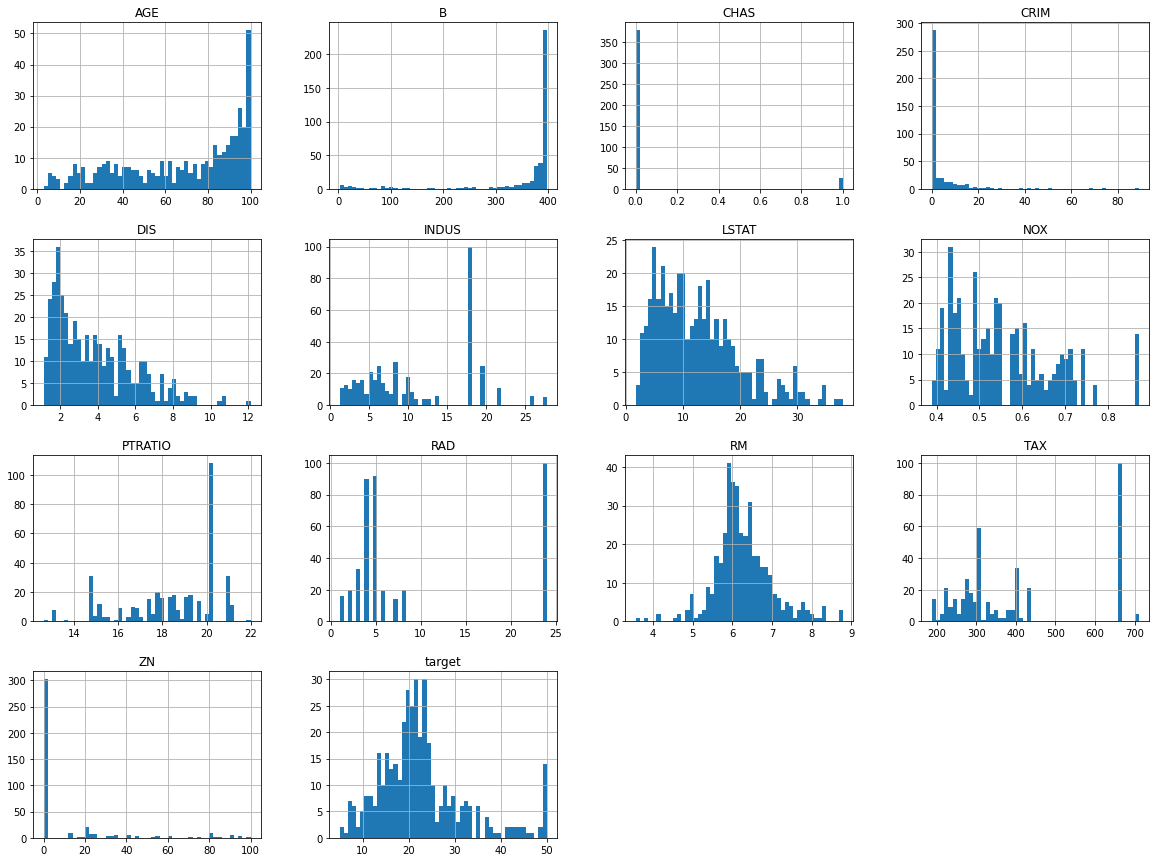

In [0]:
# show data
df.hist(bins=50, figsize=(20,15))

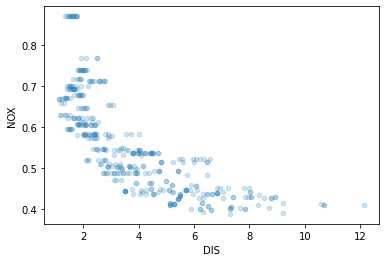

In [0]:
df.plot(kind='scatter', x='DIS', y='NOX', alpha=0.2)

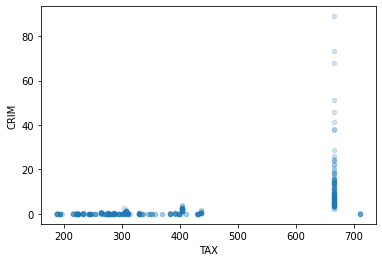

In [0]:
df.plot(kind='scatter', x='TAX', y='CRIM', alpha=0.2)

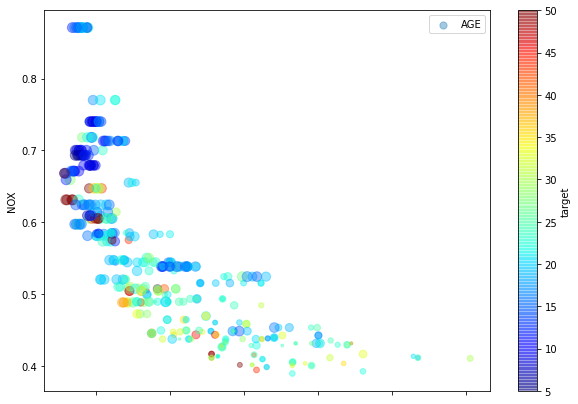

In [0]:
df.plot(kind='scatter', x='DIS', y='NOX', alpha=0.4, s=df['AGE'], label='AGE', figsize=(10, 7), c='target', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [0]:
#standard correlation coefficient
corr_mx = df.corr()

In [0]:
corr_mx['target'].sort_values(ascending=False)

target     1.000000
RM         0.696089
ZN         0.350078
B          0.335483
DIS        0.242093
CHAS       0.191589
AGE       -0.356623
RAD       -0.358425
CRIM      -0.377416
NOX       -0.425314
TAX       -0.450819
INDUS     -0.468328
PTRATIO   -0.479361
LSTAT     -0.730277
Name: target, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d7be064e0>,
      dtype=object)

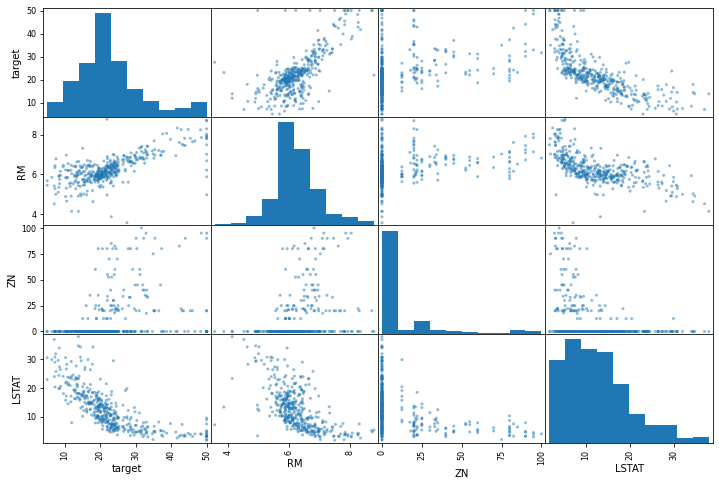

In [0]:
attributes = ['target', 'RM', 'ZN', 'LSTAT']
pd.plotting.scatter_matrix(df[attributes], figsize=(12, 8))

###Data Processing

make lists

In [0]:
cat_attribs = ['CHAS', 'RAD'] # categorical variables

In [0]:
df_num = df.drop(cat_attribs + ['target'], axis='columns')
num_attribs = list(df_num) #numerical variables

In [0]:
print(cat_attribs)
print(num_attribs)

['CHAS', 'RAD']
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']


define pipelines

In [0]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [0]:
num_pipeline = Pipeline([
                         ('selector', DataFrameSelector(num_attribs)), #select columns to be processed
                         ('imputer', SimpleImputer(strategy='median')), #fill NULL
                         ('std_scaler', StandardScaler()) #standarization
                       ])

In [0]:
cat_pipeline = Pipeline([
                         ('selector', DataFrameSelector(cat_attribs)), #select columns to be processed
                         ('encoder', OneHotEncoder(sparse=True)) #convert categories to onehot vectors 
                      ])

In [0]:
full_pipeline = FeatureUnion(transformer_list=[('num_pipeline', num_pipeline), ('cat_pipeline', cat_pipeline)])

apply data processing

In [0]:
X_train_processed = full_pipeline.fit_transform(df)

In [0]:
X_train_processed.shape

(404, 22)

###Train model

In [0]:
model = LinearRegression()

In [0]:
model.fit(X_train_processed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Evaluation

k-th cross validation

In [0]:
#k-th cross validation
cv = 3 #the number of foldings
scores = cross_val_score(model, X_train_processed, y_train, cv=cv, scoring='neg_mean_squared_error')
print(np.sqrt(-scores).mean(), ' +- ', np.sqrt(-scores).std())

5.119126965926634  +-  0.27122119752186036


###Test

In [0]:
df_test = pd.DataFrame(X_test,columns = dataset.feature_names)
X_test_processed = full_pipeline.fit_transform(df_test)

In [0]:
X_test_processed.shape

(102, 22)

In [0]:
y_test_pred = model.predict(X_test_processed)

In [0]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

3.5929737468916016

(array([ 1.,  2.,  0.,  2.,  3.,  0.,  2.,  1., 11.,  7.,  7., 12.,  8.,
         8., 11.,  6.,  7.,  7.,  2.,  5.]),
 array([-9.54370125, -8.71373225, -7.88376325, -7.05379425, -6.22382526,
        -5.39385626, -4.56388726, -3.73391826, -2.90394927, -2.07398027,
        -1.24401127, -0.41404227,  0.41592672,  1.24589572,  2.07586472,
         2.90583372,  3.73580272,  4.56577171,  5.39574071,  6.22570971,
         7.05567871]),
 <a list of 20 Patch objects>)

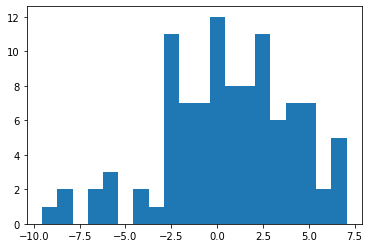

In [0]:
plt.hist(y_test_pred-y_test, bins=20)

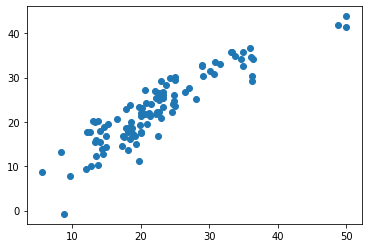

In [0]:
plt.scatter(y_test, y_test_pred)

###Save

In [0]:
#save the prediction
submissiondir = '.'
submissionname = 'submission'
pd.DataFrame(data={'target':y_test, 'prediction':y_test_pred}).to_csv(submissiondir + '/' + submissionname + ".csv", index_label=["Id"])

In [0]:
# save the model
filename = 'model.sav'
joblib.dump(model, filename)

['model.sav']

In [0]:
# load the model
loaded_model = joblib.load(filename)
result = np.sqrt(mean_squared_error(loaded_model.predict(X_test_processed), y_test))
print(result)

3.5929737468916016
